# Scenario 1: Telecom Churn Prediction
    A telecom company wants you to analyze its data, to retain its customers. You are provided with the
    'Telecom Churn' dataset.
### Problem Statement:
    You have to create a model to predict which customer will switch to other telecom service providers,
    based on the relevant customer data.
### Dataset Description:
    The dataset contains 20 features:
    State: state of the customer
    Account length: how long the account has been active
    Area code: Area code
    International plan: Does the customer have any international plan or not
    Voice mail plan: Does the customer have any voice mail plan or not
    Number vmail messages: Number of voice mail messages
    Total day minutes: Total day minutes used
    Total day calls: Total day calls made
    Total day charge: Total day charge
    Total eve minutes: Total evening minutes used
    Total eve calls: Total evening calls made
    Total eve charge: Total evening charge
    Total night minutes: Total night minutes used
    Total night calls: Total night calls made
    Total night charge: Total night charge
    Total intl minutes: Total international minutes used
    Total intl calls: Total international calls made
    Total intl charge: Total international charge
    Customer service calls: Number of customer service calls made
    Churn: Customer will switch provider or not
### Tasks to be performed:
1. Load the data, check its shape and check for null values, check unique values for categorical feature - Beginner
2. Convert categorical to numerical feature, also create new feature using 'State' column - Intermediate
3. Plot and analyze Correlation - Beginner
4. Split the dataset for training and testing - Beginner
5. Perform K-Fold cross validation - Intermediate
6. Perform Grid Search cross validation - Intermediate
7. Train a Random Forest model and perform prediction on test data - Beginner
8. Evaluate the model using classiÞcation report and accuracy score - Beginner
9. Find 10 best features using trained random forest model and perform K-Fold cross validation on the new data - Intermediate
### Topics Covered:
       Data collection
       Data analysis
       Data wrangling/Feature engineering
       Train/Test Algorithms
       Perform K-Fold and Grid Search Cross Validation
       Predicting using the trained model
       Evaluating a model: acuracy score and ClassiÞcation Report

# Question-1: Load and analyze the data
## Tasks to do:
    Load the data in a pandas DataFrame
    Have a look at the first five rows
    Check if the dataset contains any null values
    Check the shape of the dataset
    Check the unique values of the categorical columns

In [5]:
import pandas as pd
df = pd.read_csv('datasets-255093-535845-churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.shape

(2666, 20)

The dataset contains 2666 rows and 20 features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

    We can see none of the columns contain any null values.
    3 rows contain dtypes object
    The dependent feature 'Churn' contains Boolean values
    16 columns contain numeric values

In [8]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
print(len(df['State'].unique()))
print(df['International plan'].unique())
print(df['Voice mail plan'].unique())
print(df['Churn'].unique())

51
['No' 'Yes']
['Yes' 'No']
[False  True]


# Question-2: We cannot use string objects for prediction, so convert categorical feature to numerical values
### Tasks to do:
    Convert all the categorical features except State to numerical values
    
    Create new feature 'state_churn' using feature 'State', it should contain the ratio of total churn in a given state and total customers of a given state
    
    Create new feature 'avg_day_call_dur' using features 'Total day minutes' and 'Total day calls'
    
    Drop 'Total day minutes' and 'Total day calls'
    
    Similarly create new features 'avg_night_call_dur' and 'avg_eve_call_dur'


### Convert all the categorical features except State to numerical values

In [12]:
 df.replace({'International plan':{'No':0,'Yes':1},'Voice mail plan':{'No':0,'Yes':1},'Churn':{False:0,True:1}},inplace=True)

In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Create new feature 'state_churn' using feature 'State', it should contain the ratio of total churn in a given state and total customers of a given state 

In [14]:
import numpy as np
state_churn = df.groupby(['State'])['Churn'].agg('mean')
state_churn

State
AK    0.069767
AL    0.106061
AR    0.234043
AZ    0.066667
CA    0.208333
CO    0.118644
CT    0.186441
DC    0.111111
DE    0.156863
FL    0.129630
GA    0.163265
HI    0.045455
IA    0.078947
ID    0.089286
IL    0.088889
IN    0.111111
KS    0.192308
KY    0.139535
LA    0.085714
MA    0.153846
MD    0.233333
ME    0.224490
MI    0.224138
MN    0.185714
MO    0.098039
MS    0.229167
MT    0.188679
NC    0.160714
ND    0.090909
NE    0.088889
NH    0.209302
NJ    0.280000
NM    0.090909
NV    0.213115
NY    0.176471
OH    0.151515
OK    0.134615
OR    0.112903
PA    0.222222
RI    0.062500
SC    0.224490
SD    0.122449
TN    0.121951
TX    0.290909
UT    0.133333
VA    0.059701
VT    0.105263
WA    0.208333
WI    0.065574
WV    0.079545
WY    0.121212
Name: Churn, dtype: float64

In [15]:
d=dict()
for i in df.State.unique():
    if i not in d:
        d[i]=state_churn[i]
df['state_churn']=df['State'].map(d)

### Create new feature 'avg_day_call_dur' using features 'Total day minutes' and 'Total day calls'
 

In [16]:
df['avg_day_call_dur']=df['Total day minutes']/df['Total day calls']
df.drop(columns=['Total day minutes','Total day calls'],axis=1,inplace=True)

### Drop 'Total day minutes' and 'Total day calls'
### Similarly create new features 'avg_night_call_dur' and 'avg_eve_call_dur'

In [18]:
df['avg_night_call_dur']=df['Total night minutes']/df['Total night calls']
df.drop(columns=['Total night minutes','Total night calls'],axis=1,inplace=True)
df['avg_eve_call_dur']=df['Total eve minutes']/df['Total eve calls']
df.drop(columns=['Total eve minutes','Total eve calls'],axis=1,inplace=True)

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day charge          0
Total eve charge          0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
state_churn               0
avg_day_call_dur          0
avg_night_call_dur        0
avg_eve_call_dur          0
dtype: int64

In [20]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day charge,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn,avg_day_call_dur,avg_night_call_dur,avg_eve_call_dur
0,KS,128,415,0,1,25,45.07,16.78,11.01,10.0,3,2.70,1,0,0.192308,2.410000,2.689011,1.993939
1,OH,107,415,0,1,26,27.47,16.62,11.45,13.7,3,3.70,1,0,0.151515,1.313821,2.469903,1.898058
2,NJ,137,415,0,0,0,41.38,10.30,7.32,12.2,5,3.29,0,0,0.280000,2.135088,1.563462,1.101818
3,OH,84,408,1,0,0,50.90,5.26,8.86,6.6,7,1.78,2,0,0.151515,4.216901,2.212360,0.703409
4,OK,75,415,1,0,0,28.34,12.61,8.41,10.1,3,2.73,3,0,0.134615,1.475221,1.544628,1.215574


## Question-3: Plot the correlation and tell which feature will help the mostwhile prediction
### Tasks to do:
    Calculate correlation
    Plot the correlation
    Compare the correlation

In [21]:
df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day charge,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn,avg_day_call_dur,avg_night_call_dur,avg_eve_call_dur
Account length,1.000000,-0.008663,0.024483,0.002414,-0.003029,0.002804,-0.016113,-0.009033,0.011368,0.017622,0.011383,0.002490,0.017796,-0.028692,-0.018889,0.004824,-0.035830
Area code,-0.008663,1.000000,0.047215,0.007336,-0.000440,-0.021661,-0.000127,-0.003211,-0.012870,-0.027488,-0.012980,0.035048,0.001684,0.005229,-0.014854,-0.006479,0.009455
International plan,0.024483,0.047215,1.000000,0.001898,0.005637,0.048997,0.026087,-0.010547,0.052973,0.011431,0.052849,-0.035857,0.278032,0.028121,0.048109,-0.018305,0.001871
Voice mail plan,0.002414,0.007336,0.001898,1.000000,0.957142,0.012087,0.018074,0.000646,-0.014382,0.014980,-0.014349,-0.021843,-0.099058,-0.016406,0.008644,-0.006761,0.002279
Number vmail messages,-0.003029,-0.000440,0.005637,0.957142,1.000000,0.017761,0.010368,-0.000631,-0.004549,0.026813,-0.004528,-0.018582,-0.086238,-0.014640,0.012497,-0.003728,-0.005365
Total day charge,0.002804,-0.021661,0.048997,0.012087,0.017761,1.000000,0.003637,0.012000,-0.014114,0.003585,-0.014009,-0.022794,0.199337,0.037118,0.777686,0.002989,-0.001942
Total eve charge,-0.016113,-0.000127,0.026087,0.018074,0.010368,0.003637,1.000000,-0.014503,-0.006556,0.002664,-0.006581,-0.013347,0.073295,0.019370,0.022201,-0.012202,0.690898
Total night charge,-0.009033,-0.003211,-0.010547,0.000646,-0.000631,0.012000,-0.014503,1.000000,-0.009085,-0.001382,-0.008987,0.005546,0.034115,-0.003901,0.009390,0.739553,-0.010350
Total intl minutes,0.011368,-0.012870,0.052973,-0.014382,-0.004549,-0.014114,-0.006556,-0.009085,1.000000,0.036490,0.999993,-0.002053,0.087394,0.047699,-0.025868,0.014725,-0.009420
Total intl calls,0.017622,-0.027488,0.011431,0.014980,0.026813,0.003585,0.002664,-0.001382,0.036490,1.000000,0.036539,-0.021113,-0.068642,-0.010107,0.002960,-0.015640,-0.003210


<AxesSubplot:>

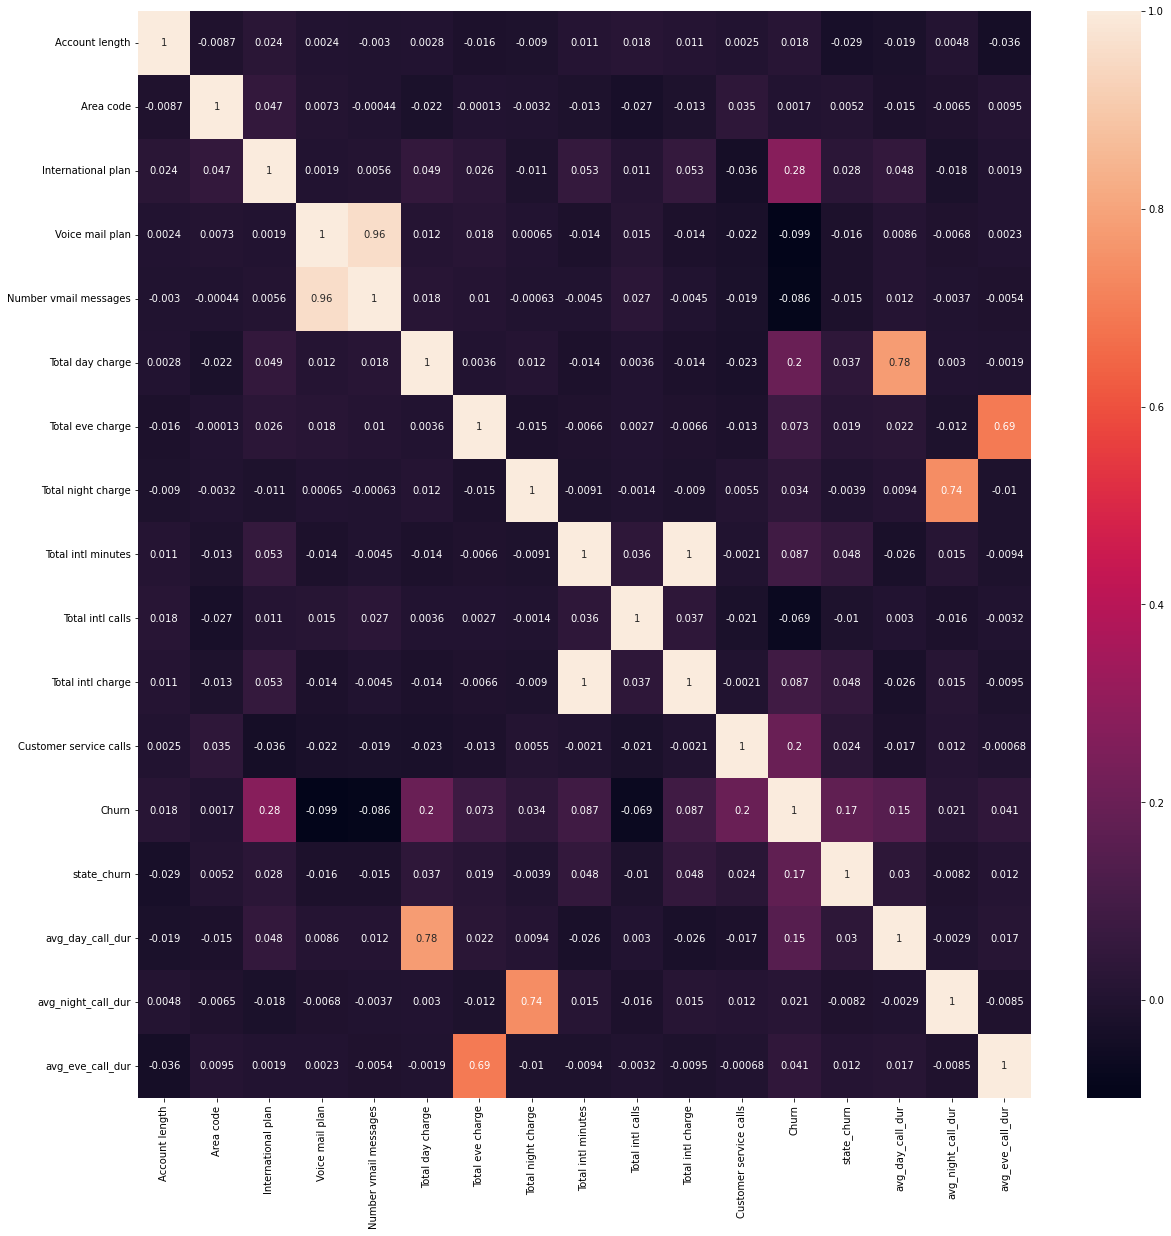

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation,annot=True,ax=ax)

We can see the new feature 'state_churn' is also highly correlated with the target variable 'churn'

## Question-4: Split the data into training and testing datasets
### Tasks to do:
    Drop the feature 'State' as we cannot use string object for prediction
    Split the dataset using sklearn, with 20% for testing with random_state=7

In [23]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['State','Churn'],axis=1)
y= df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,
random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2130, 16)
(533, 16)
(2130,)
(533,)


## Question-5: Perform K-Fold cross validation
### Tasks to do:
    Perform Stratified K-fold with K=10
    Perform Stratified K-Fold with Random Forest and Decision Tree algorithm
    Calculate the mean score of each iteration
    This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(10)
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=7)
model_dt = DecisionTreeClassifier()
score=cross_val_score(model_rf, X_train, y_train, cv=cv)
print(f'score of random forest classifier:{score.mean()}')
score=cross_val_score(model_dt, X_train, y_train, cv=cv)
print(f'score of decision tree classifier:{score.mean()}')

score of random forest classifier:0.9427230046948356
score of decision tree classifier:0.896713615023474


Since we are getting higher accuracy from random forest, let us train our data random forest model

## Question-6: Perform Grid Search cross validation to find the best parameters for Random Forest Classifier
### Tasks to do:
    Perform Grid Search CV on random forest classiÞer to Þnd the best number of: trees between 20 to 100
    maximum depth for the trees, between 3 and 15
    maximum features to be used, between range 4 and 17
            Use the following dictionary to implement the first 3 points:
           {'n_estimators':range(20,100,20), 'max_depth':range(3,15),'max_features':range(4,17)}
    Perform GridSearchCV with scoring = recall
    Cross validate the model with 5 folds
    Check the best score and best estimator found by cross validation

In [26]:
from sklearn.model_selection import GridSearchCV
model_params = {'n_estimators':range(20,100,20), 'max_depth':range(3,15), 'max_features':range(4,17)}
model_cv = GridSearchCV(model_rf,model_params,cv=5,n_jobs=-1,verbose=True,return_train_score = True,scoring = 'recall')
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=7),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': range(4, 17),
                         'n_estimators': range(20, 100, 20)},
             return_train_score=True, scoring='recall', verbose=True)

In [27]:
model_cv.best_params_

{'max_depth': 14, 'max_features': 13, 'n_estimators': 60}

    The best parameters found by grid search are max_depth=11, max_features=8 and n_estimators =80
    max_depth: maximum depth of the tree
    max_features: the number of features to consider for finding best split
    n_estimators: the number of trees by random forest model

In [28]:
model_cv.best_score_

0.7484848484848484

In [29]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=14, max_features=13, n_estimators=60,
                       n_jobs=-1, random_state=7)

## Question-7: Train the Random Forest model
### Tasks to do:
    Train the random forest model using the parameters found by Grid Search CV
    Also, predict the classes for test data

In [30]:
final_model = model_cv.best_estimator_
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)

## Question-8: Evaluate the model
### Tasks to do:
    Evaluate the model using accuracy score
    Evaluate the model using classiÞcation report

In [31]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy score on test data is {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy score on test data is 0.9568480300187617
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       472
           1       0.93      0.67      0.78        61

    accuracy                           0.96       533
   macro avg       0.95      0.83      0.88       533
weighted avg       0.96      0.96      0.95       533



## Question-9: Find the 10 best features and perform cross validation using just 10 features
### Tasks to do:
    Find the 10 best features from the random forest model
    Create new dataframe with the 10 best features
    Perform K-Fold cross validation on the new dataset with reduced features
    Compare the score with previous K-fold cross validation

In [32]:
from numpy import argsort
imp = final_model.feature_importances_
x= argsort(imp)[::-1]
col_names=list(df.columns)
col_names.remove('State')
col_names.remove('Churn')
top_features = list()
for i in x[:13]:
    print(col_names[i])
    top_features.append(col_names[i])

Total day charge
Customer service calls
Total eve charge
International plan
Total intl calls
Total intl minutes
avg_eve_call_dur
Total intl charge
avg_day_call_dur
Total night charge
avg_night_call_dur
Number vmail messages
state_churn


In [33]:
X_new = df[top_features]
X_new

,Total day charge,Customer service calls,Total eve charge,International plan,Total intl calls,Total intl minutes,avg_eve_call_dur,Total intl charge,avg_day_call_dur,Total night charge,avg_night_call_dur,Number vmail messages,state_churn
0,45.07,1,16.78,0,3,10.0,1.993939,2.70,2.410000,11.01,2.689011,25,0.192308
1,27.47,1,16.62,0,3,13.7,1.898058,3.70,1.313821,11.45,2.469903,26,0.151515
2,41.38,0,10.30,0,5,12.2,1.101818,3.29,2.135088,7.32,1.563462,0,0.280000
3,50.90,2,5.26,1,7,6.6,0.703409,1.78,4.216901,8.86,2.212360,0,0.151515
4,28.34,3,12.61,1,3,10.1,1.215574,2.73,1.475221,8.41,1.544628,0,0.134615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,22.90,2,16.12,0,5,11.8,2.789706,3.19,1.374490,9.96,1.729688,0,0.224490
2662,26.55,2,18.32,0,6,9.9,1.710317,2.67,2.028571,12.56,3.362651,36,0.066667
2663,39.29,3,13.04,0,4,9.6,2.789091,2.59,4.054386,8.61,1.555285,0,0.079545
2664,30.74,2,24.55,0,6,14.1,4.979310,3.81,1.658716,8.64,2.108791,0,0.062500


In [34]:
new_model = model_cv.best_estimator_
score=cross_val_score(new_model, X_new, y, cv=5)
print(f'score of random forest classifier:{score.mean()}')

score of random forest classifier:0.9463069023402785


    We can see with just 10 features accuracy is quite good as compared to previous K-Fold cross validation
        Current Score: 0.946
        Previous Score: 0.947